In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
data=pd.read_csv('/content/Fifa-20.csv')

In [18]:
pd.set_option('display.max_columns', None)
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,01-07-2019,

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [20]:
data.shape

(18278, 104)

In [21]:
data.columns = [c.replace(' ', '') for c in data.columns]

In [22]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

## Explotatory Data Analysis

In [23]:
Nationality_count= data['nationality'].value_counts()
Nationality_count= Nationality_count.reset_index()
Nationality_count.columns= ['Nations','Count']

In [24]:
Nationality_count.iloc[0:10,:]

,Nations,Count
0,England,1667
1,Germany,1216
2,Spain,1035
3,France,984
4,Argentina,886
5,Brazil,824
6,Italy,732
7,Colombia,591
8,Japan,453
9,Netherlands,416


Text(0.5, 1.0, ' Top10 Countries with Most Players ')

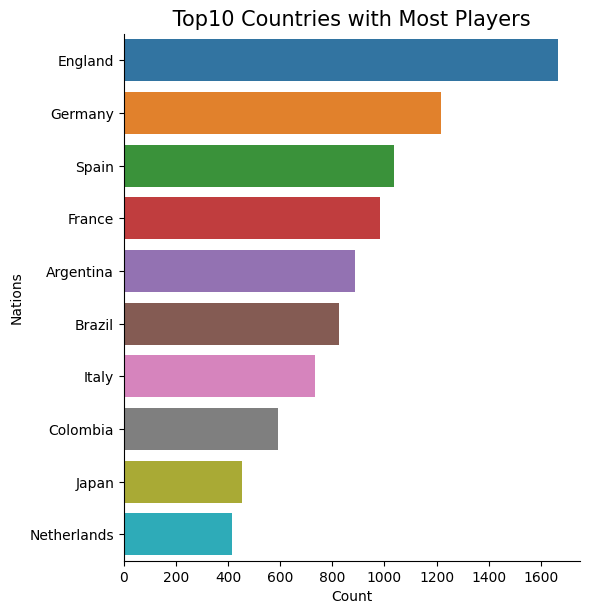

In [25]:
sns.catplot(data=Nationality_count.head(10), y='Nations',x='Count',kind='bar',height=6)
plt.title(' Top10 Countries with Most Players ', fontsize='15')

#### Insights
  * As seen in the above plot 6 of the top 10 countries with most players are from Europe

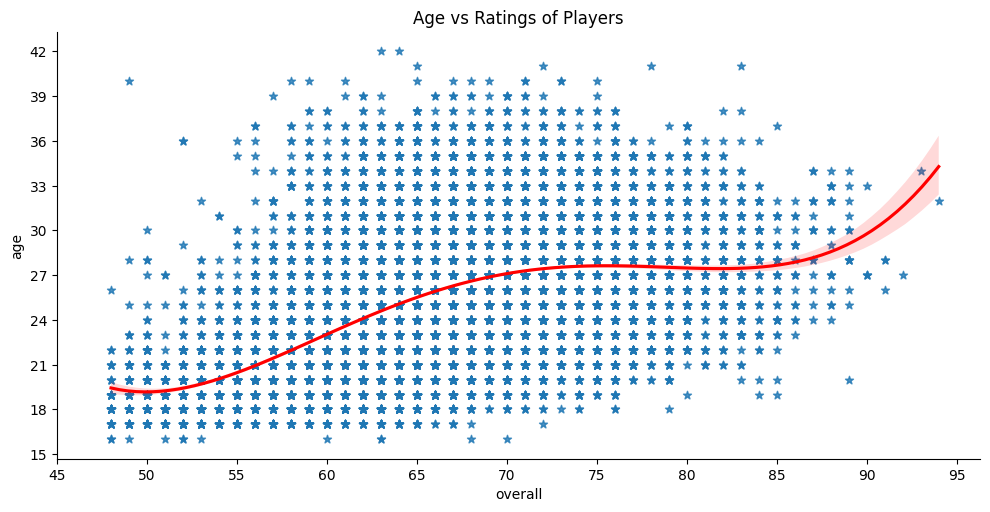

In [26]:
sns.lmplot(data=data, x='overall',y='age',markers='*',order=4,line_kws={'color': 'red'},aspect=2)
plt.xticks(np.arange(45,100,5))
plt.yticks(np.arange(15,45,3))
plt.title('Age vs Ratings of Players')
plt.show()

#### Insights
* The increase in age has seen better performance, as the rating shows gradual increase after 24 years of age.

In [27]:
int_conv= data[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']]

In [28]:
for column_name in int_conv:    # Conversion of player position rating from string to int

    data[column_name + '_num'] = data[column_name].str.split('+').str[0].fillna(0).astype(int)
    data.drop(columns=[column_name], inplace=True)
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls_num,st_num,rs_num,lw_num,lf_num,cf_num,rf_num,rw_num,lam_num,cam_num,ram_num,lm_num,lcm_num,cm_num,rcm_num,rm_num,lwb_num,ldm_num,cdm_num,rdm_num,rwb_num,lb_num,lcb_num,cb_num,rcb_num,rb_num
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,01-07-2019,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finess

In [29]:
offense_players= data.groupby('short_name', as_index=False)['wage_eur','overall','attacking_finishing','ls_num','st_num','rs_num','lw_num','lf_num','cf_num','rf_num','rw_num','lam_num','cam_num','ram_num'].mean()
offense_players.sort_values(by='attacking_finishing', inplace=True, ascending=False)
offense_players.head()

,short_name,wage_eur,overall,attacking_finishing,ls_num,st_num,rs_num,lw_num,lf_num,cf_num,rf_num,rw_num,lam_num,cam_num,ram_num
9723,L. Messi,565000.0,94.0,95.0,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0
3164,Cristiano Ronaldo,405000.0,93.0,94.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0
14528,S. Agüero,300000.0,89.0,93.0,87.0,87.0,87.0,85.0,87.0,87.0,87.0,85.0,85.0,85.0,85.0
11581,M. Salah,240000.0,90.0,90.0,84.0,84.0,84.0,88.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0
578,A. Griezmann,370000.0,89.0,89.0,85.0,85.0,85.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0


Text(0.5, 1.0, ' Top 20 Best Finishers in Fifa 20 ')

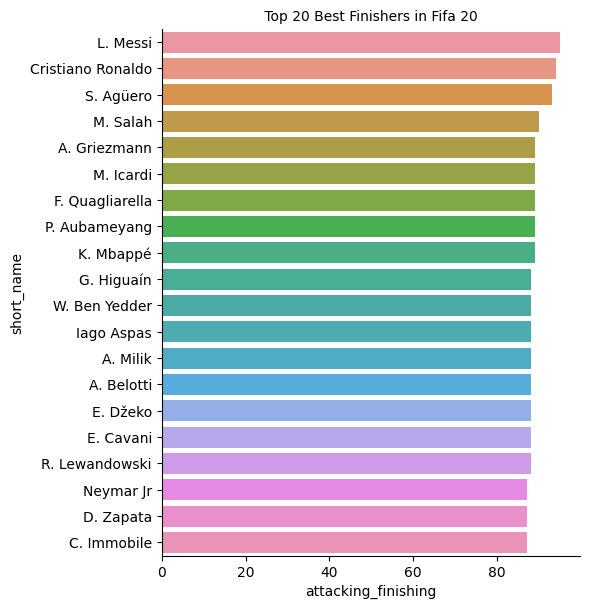

In [31]:
sns.catplot(data=offense_players.head(20), y='short_name',x='attacking_finishing',kind='bar',height=6)
plt.title(' Top 20 Best Finishers in Fifa 20 ', fontsize='10')

#### insights
* These are the Top 20 best finshers in offense positions as they have high finishing score.

In [32]:
value_players= data.groupby('short_name', as_index=False)['value_eur','wage_eur','overall','potential'].mean()
value_players.sort_values(by='value_eur', inplace=True, ascending=False)
value_players.head(10)

,short_name,value_eur,wage_eur,overall,potential
12658,Neymar Jr,105500000.0,290000.0,92.0,92.0
9723,L. Messi,95500000.0,565000.0,94.0,94.0
8900,K. Mbappé,93500000.0,155000.0,89.0,95.0
8693,K. De Bruyne,90000000.0,370000.0,91.0,91.0
4459,E. Hazard,90000000.0,470000.0,91.0,91.0
11581,M. Salah,80500000.0,240000.0,90.0,90.0
16556,V. van Dijk,78000000.0,200000.0,90.0,91.0
7851,J. Oblak,77500000.0,125000.0,91.0,93.0
13096,P. Dybala,76500000.0,215000.0,88.0,92.0
14226,R. Sterling,73000000.0,255000.0,88.0,90.0


#### Insights
* These are the top 10 valuable players in Fifa20 in terms of Market value.

## Data Preprocessing

In [33]:
data.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [34]:
df= data[['short_name', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves','pace', 'shooting','passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]
df.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [35]:
df.shape

(18278, 57)

In [36]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
international_reputation          0
weak_foot                         0
skill_moves                       0
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys           

In [37]:
# Changeing players goal keeping abilities to 0 from NaN

gk_fill = ['gk_speed', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_positioning']
df[gk_fill] = df[gk_fill].fillna(0)

In [40]:
# Changeing Goal keepers playing abilities to 0 from Nan

play_fill= ['pace', 'shooting','dribbling', 'defending', 'physic','passing']
df[play_fill]= df[play_fill].fillna(0)

In [41]:
df.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_lo

In [42]:
df= df[df.overall >=75]
df.shape

(2121, 57)

In [43]:
# Assigning some features to a list for future visualization

names= df.short_name.tolist()
rating= df.overall.tolist()
position= data.player_positions.tolist()
value= df.value_eur.tolist()
wage= df.wage_eur.tolist()

# droping short name from df for cluster building

df= df.drop(['short_name'],axis=1)

In [44]:
# Finding Correlated features

def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range (i):
      if (corr_matrix.iloc[i,j])>=threshold:
        col_name=corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [45]:
corr_features= correlation(df,0.8)
corr_features , print('Total correlated features:', len(corr_features))

Total correlated features: 38


({'attacking_crossing',
  'attacking_finishing',
  'attacking_heading_accuracy',
  'attacking_short_passing',
  'attacking_volleys',
  'defending_marking',
  'defending_sliding_tackle',
  'defending_standing_tackle',
  'dribbling',
  'gk_handling',
  'gk_kicking',
  'gk_positioning',
  'gk_reflexes',
  'gk_speed',
  'goalkeeping_diving',
  'goalkeeping_handling',
  'goalkeeping_kicking',
  'goalkeeping_positioning',
  'goalkeeping_reflexes',
  'mentality_aggression',
  'mentality_interceptions',
  'mentality_penalties',
  'mentality_positioning',
  'movement_acceleration',
  'movement_agility',
  'movement_balance',
  'movement_sprint_speed',
  'passing',
  'physic',
  'power_long_shots',
  'power_stamina',
  'shooting',
  'skill_ball_control',
  'skill_curve',
  'skill_dribbling',
  'skill_fk_accuracy',
  'skill_long_passing',
  'value_eur'},
 None)

In [46]:
# droping correlated features for cluster building

df.drop(corr_features,axis=1,inplace=True)

In [47]:
df.shape

(2121, 18)

In [48]:
df.head(10)

,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,weak_foot,skill_moves,pace,defending,gk_diving,movement_reactions,power_shot_power,power_jumping,power_strength,mentality_vision,mentality_composure
0,32,170,72,94,94,565000,5,4,4,87.0,39.0,0.0,95,86,68,68,94,96
1,34,187,83,93,93,405000,5,4,5,90.0,35.0,0.0,96,95,95,78,82,95
2,27,175,68,92,92,290000,5,5,5,91.0,32.0,0.0,92,80,61,49,90,94
3,26,188,87,91,93,125000,3,3,1,0.0,0.0,87.0,88,59,78,78,65,68
4,28,175,74,91,91,470000,4,4,4,91.0,35.0,0.0,90,82,56,63,89,91
5,28,181,70,91,91,370000,4,5,4,76.0,61.0,0.0,91,91,63,74,94,91
6,27,187,85,90,93,250000,3,4,1,0.0,0.0,88.0,86,66,79,78,70,70
7,27,193,92,90,91,200000,3,3,2,77.0,90.0,0.0,88,81,90,92,65,89
8,33,172,66,90,90,340000,4,4,4,74.0,72.0,0.0,89,79,68,58,91,92
9,27,175,71,90,90,240000,3,3,4,93.0,45.0,0.0,92,80,69,73,84,91


In [49]:
# scaling

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x= df.values
x_scaled= scaler.fit_transform(x)
x_norm= pd.DataFrame(x_scaled)

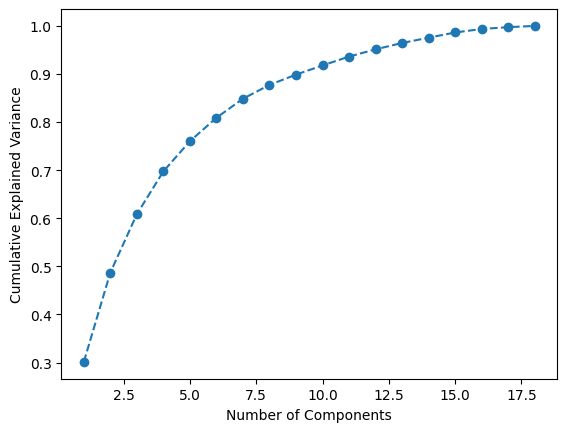

In [50]:
# Applying PCA to reduce the dimensions(features)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(x_norm)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [51]:
# from the graph, chosen 4

pca = PCA(n_components=4)
pca_reduced= pd.DataFrame(pca.fit_transform(x_norm))

## Clustering

In [52]:
from sklearn.cluster import KMeans

model= KMeans(n_clusters=4)

model.fit(pca_reduced)

KMeans(n_clusters=4)

In [53]:
labels= model.predict(pca_reduced)

centroid= model.cluster_centers_

clusters= model.labels_.tolist()

In [54]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_reduced,clusters)

0.3037303973785909

Text(0, 0.5, 'WCSS')

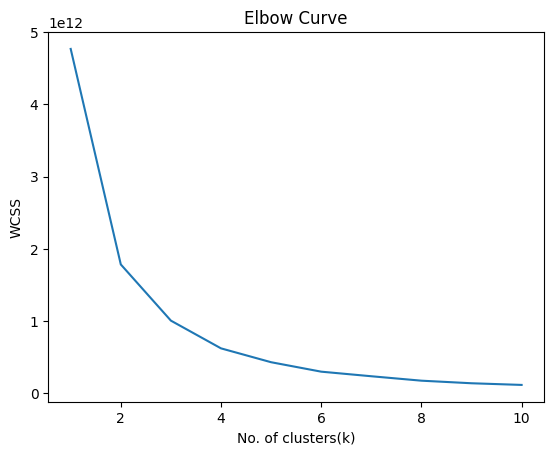

In [ ]:
# Elbow curve to confirm the No of clusters

WCSS=[]

for i in range (1,11):
  model=KMeans(n_clusters=i,random_state=20)
  model.fit(x)
  WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('Elbow Curve')
plt.xlabel('No. of clusters(k)')
plt.ylabel('WCSS')

In [55]:
pca_reduced['cluster'] = clusters
pca_reduced['name'] = names
pca_reduced['overall']= rating
pca_reduced['value_eur'] = value
pca_reduced['wage_eur'] = wage

pca_reduced.columns = ['a','b','c','d','cluster', 'name','overall','value_eur','wage_eur']
pca_reduced.head()

,a,b,c,d,cluster,name,overall,value_eur,wage_eur
0,7.858256,9.930843,2.954542,0.462091,0,L. Messi,94,95500000,565000
1,6.264232,9.754391,0.392301,1.158805,0,Cristiano Ronaldo,93,58500000,405000
2,7.161750,6.333477,3.610334,0.070120,0,Neymar Jr,92,105500000,290000
3,-2.301195,7.030977,2.993831,-1.446169,2,J. Oblak,91,77500000,125000
4,6.419201,7.543013,2.861558,-0.352896,0,E. Hazard,91,90000000,470000


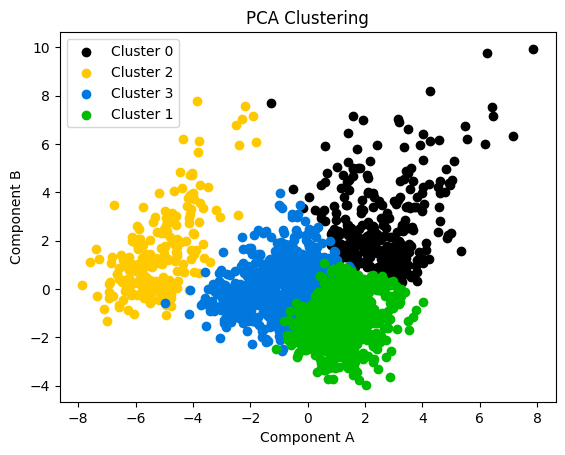

In [64]:

# unique cluster labels
unique_clusters = pca_reduced['cluster'].unique()

colors = plt.cm.nipy_spectral(unique_clusters.astype(float) / len(unique_clusters))

# Plot the data points with cluster labels as colors
for cluster in unique_clusters:
    cluster_data = pca_reduced[pca_reduced['cluster'] == cluster]
    plt.scatter(cluster_data['a'], cluster_data['b'], color=colors[int(cluster)], label=f'Cluster {int(cluster)}')

plt.xlabel('Component A')
plt.ylabel('Component B')
plt.title('PCA Clustering')
plt.legend(loc='best')
plt.show()


In [70]:

# Get unique cluster labels
unique_clusters = pca_reduced['cluster'].unique()

# Initialize a dictionary to store cluster names
cluster_names = {}

# Iterate through unique cluster labels and extract corresponding names
for cluster in unique_clusters:
    cluster_data = pca_reduced[pca_reduced['cluster'] == cluster]
    names_in_cluster = cluster_data['name'].tolist()
    cluster_names[cluster] = names_in_cluster

# Cluster names stored as a list or array, can be  retrieved by cluster label
cluster_0_names = cluster_names[0]
cluster_1_names = cluster_names[1]
cluster_2_names = cluster_names[2]
cluster_3_names = cluster_names[3]

In [71]:
# Printing the lenght of Clusters

print('Cluster 1:',len(cluster_1_names)), print('Cluster 2:',len(cluster_2_names)), print('Cluster 3:',len(cluster_3_names)), print('Cluster 0:',len(cluster_0_names))

Cluster 1: 859
Cluster 2: 212
Cluster 3: 761
Cluster 0: 289


(None, None, None, None)

In [72]:
# Printing the Players assigned to each clusters by the Model

print('Cluster_1_players:',cluster_1_names), print('Cluster_2_players:',cluster_2_names), print('Cluster_3_players:',cluster_3_names), print('Cluster_0_players:',cluster_0_names)

Cluster_1_players: ['Pablo Sarabia', 'Oyarzabal', 'A. Correa', 'Suso', 'N. Tagliafico', 'Muniain', 'M. Politano', 'Rafa', 'Jesús Navas', 'Marlos', 'Taison', 'S. El Shaarawy', 'Q. Promes', 'Rosberto Dourado', 'J. Sildero', 'H. Aouar', 'Pablo Fornals', 'Gayà', 'David Neres', 'J. Martínez', 'R. Fraser', 'Thiago Mendes', 'M. Brozović', 'A. Ljajić', 'J. Corona', 'Gerard Moreno', 'Quaresma', 'L. López', 'Renato Augusto', 'A. Guardado', 'D. Payet', 'Beñat', 'N. Gaitán', 'S. Giovinco', 'E. Zahavi', 'F. Vázquez', 'M. Acuña', 'Laure Santeiro', 'S. Ardero', 'N. Barella', 'Carlos Soler', 'H. Winks', 'Melendo', 'Héctor Bellerín', 'Santi Mina', 'Rony Lopes', 'J. Correa', 'M. Eggestein', 'Odriozola', 'Sergi Darder', 'L. Paredes', 'E. Hysaj', 'K. Baldé', 'V. Rongier', 'A. Oxlade-Chamberlain', 'Campaña', 'Deulofeu', 'Bernat', 'J. Quintero', 'Samu Castillejo', 'A. Rebić', 'M. Almirón', 'M. Lazzari', 'M. Lanzini', 'H. Vanaken', 'C. Wilson', 'D. Klaassen', 'Portu', 'Manu Trigueros', 'H. Çalhanoğlu', 'M. D

(None, None, None, None)

## Conclusion
* Cluster 0: This Cluster consists of Forward players like Strikers, Wingers and Forwards.

* Cluster 1: This Cluster consists of Midfiled players and Attacking Midfielders.

* Cluster 2: This Cluster has mostly Goal keepers.

* Cluster 3: This Cluster has defenders and centre back players.